# Coursework 3

### Submission format
Solve all the question directly in this notebook. Some tasks require writing and running code. Other times you are asked to write answers to questions within the 'Markdown' cells and the answers are propmted by  __Your answer__:.

Submit the solved Jupyter notebooks with the code and answers to KEATS. Make sure that all your code is running and the results are displayed. We will not be re-running your notebook when marking. You do not need to submit the data files with your notebooks. Your submission should consists of a single solved Python notebook file named  __CW3.ipynb__.

Marks obtained in this coursework will be converted to __30% of your final grade__.

### System requirements

Q1-3 can be run on your local machines on CPU. Q4 needs to be run on Google Colab, because it requires GPU. If you prefer, you can solve all questions on Colab, intructions for uploading the datasets on Colab are given.

### Questions

Queries about the coursework should be sent to rachel.sparks@kcl.ac.uk and maria.deprez@kcl.ac.uk. Please note that we are not able to answer any queries about *how* you should answer the questions. Your queries should only be related to clarity of the instructions or practical difficulties with the submission.

### Guidance on use of generative AI
We emphasise that it is important that you submit your own work. Your marks will be based on your ability to demonstrate understanding of the techniques and methods discussed in class. We can recognise AI generated text and code. If you would like to use generative AI, limit it to searching for ideas, learning about machine learning techniques and correcting grammar (though grammar has no influence on your marks). Submitting AI generated content may result in a disciplinary hearing.

### Guidance on written comments
Write your answers concisely and stay below the word limit. The word limit is generous, do not try to write more words than necessary. Do not copy text from the lectures and tutorials, you will not be given marks for that. We are interested in specific insights into your implemented solutions. Generic comments will not result in marks.

##  Breast Cancer Wisconsin Prognostic Dataset

In tutorials we have been looking at the Breast Cancer Wisconsin Diagnostic Dataset, where the task is to distinguish benign and cancerous cells in fine needle aspiration, on method breast biopsies are performed, based on 30 features.

The dataset for this coursework is a litte bit different, but related. In this dataset all patients have cancer. Some patients go on to have a cancer recurrence, __cancer returning after treatment (label 1)__, and some remain __cancer-free after the end of treatment (label 0)__. For this dataset __32 features__ are extracted. The two new features are the size of the original tumour lesion and the number of lymph nodes involved, these are number of lymph node biopsies that contain cancer cells a well known early indication of cancer spread.

**Both Question 1 and 2 use this dataset.**

In [ ]:
# only do this if you work on Google Colab
# uncomment code below and run the cell
# then upload the files

# uncomment this
# from google.colab import files
# files.upload()

In [1]:
import pandas as pd

# Reading a CSV file into a DataFrame
df = pd.read_csv('datasets/dataset.csv', header=None)
data = df.to_numpy();

lf = pd.read_csv('datasets/labels.csv', header=None)
labels = lf.to_numpy();

nf = pd.read_csv('datasets/names.csv', header=None)
names = nf.to_numpy()[0];
print('Features:')
print(names)

# note: you might need to modify the paths if you work on google colab

Features:
['Mean Radius' 'Mean Texture' 'Mean Perimeter' 'Mean Area'
 'Mean Smoothness' 'Mean Compactness' 'Mean Concavity'
 'Mean Concave Poinsts' 'Mean Symmetry' 'Mean Fractal Dimension'
 'SE Radius' 'SE Texture' 'SE Perimeter' 'SE Area' 'SE Smoothness'
 'SE Compactness' 'SE Concvity' 'SE Concave Points' 'SE Symmetry'
 'SE Fractal Dimension' 'Worst Radius' 'Worst Texture' 'Worst Perimeter'
 'Worst Area' 'Worst Smoothness' 'Worst Compactness' 'Worst Concavity'
 'Worst Concave Points' 'Worst Symmetry' 'Worst Fractal Dimension'
 'Tumour Size (cm)' 'Positive Axillary Lymph Nodes']


### Preprocessing
In the code below we create the feature matrix `X` and `y` that are `numpy` arrays and scale the features using `StandardScaler`

In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = StandardScaler().fit_transform(data)

# to convert the numbers to labels
y = (labels=='R').reshape(-1).astype(int)

print('Features dim: ', X.shape)
print('Labels dim: ', y.shape)
print('We have {} samples and {} features.'.format(X.shape[0],X.shape[1]))

Features dim:  (198, 32)
Labels dim:  (198,)
We have 198 samples and 32 features.


## Question 1 - Compare classifiers

**[Total: 30 marks]**

### Question 1A. Explore the structure of the data [6 marks]

**Task 1.1 [2 marks]**: Use PCA to reduce the features to two dimensions and plot the reduced data highlighting the labels. To improve visualisation, make the points in the plots transparent by setting `alpha` to 0.5.

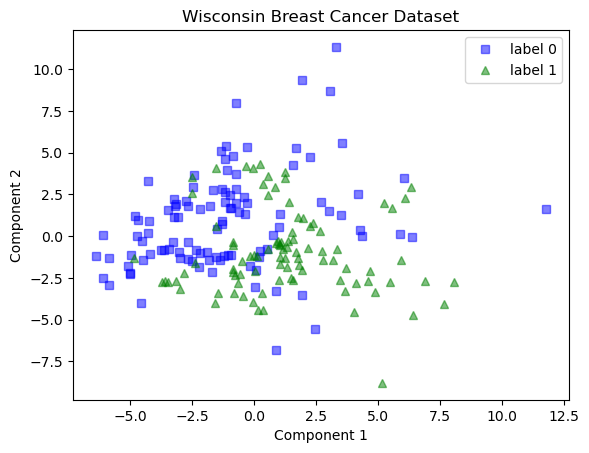

In [3]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

def PlotData2D(X, y):
    plt.plot(X[y==0, 0], X[y==0, 1], "bs", alpha=0.5, label = "label 0")
    plt.plot(X[y==1, 0], X[y==1, 1], "g^", alpha=0.5, label = "label 1")
    # annotate
    plt.legend()
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Wisconsin Breast Cancer Dataset')

# Performed PCA
model = PCA(n_components=2)
features_PCA = model.fit_transform(X)

# Plot data
PlotData2D(features_PCA, y)

**Task 1.2  [3 marks]**: Use the f-score as a univariate feature selection method.

Print the top two feature names and plot the two features using `PlotData2D`.

Top 2 Features: 
Worst Radius
Worst Perimeter


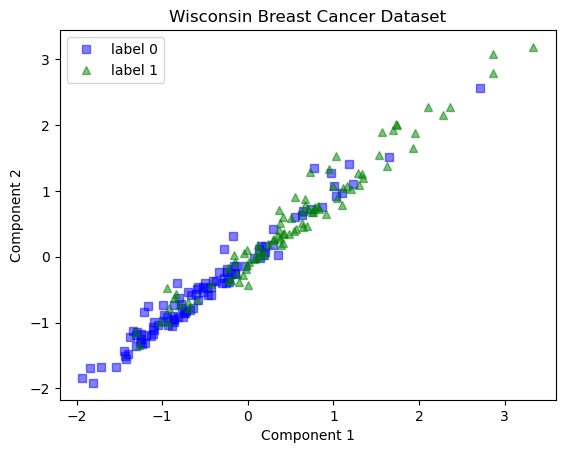

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# Select best features
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Print top two feature names
scores = selector.scores_
top2_scores = np.argsort(scores)[-2:][::-1]
print("Top 2 Features: ")
for i in top2_scores:
    print(f"{names[i]}")

# Plot the data
PlotData2D(X_selected, y)

**Question [1 mark]:** What can you say about the top two features?

**Your answer [max 50 words]:**

In [ ]:
# The top 2 features are strongly positively correlated which means that they carry similar information.
# This renders one of the features redundant for classification tasks when used in conjunction with one another.

### Question 1B. Random forest classification [10 marks]

**Task 1.3 [6 marks]:** Random forest classification.
* Tune and fit a Random Forest Classifier. Print optimal parameters.
* Calculate and print both training and cross-validated accuracy.
* Extract and display the two most important features, including their names and importance values.

In [ ]:
# Tune and fit a random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
grid_param = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 5]
}

# Grid Search CV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, grid_param, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X,y)

# print best parameters
print("Best Parameters:", grid_search.best_params_)

# Save the model
model=grid_search.best_estimator_

Best Parameters: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Calculate training and cross-validated accuracy of the best model
from sklearn.model_selection import cross_val_score

# training accuracy
training_accuracy = model.score(X, y)
print('Training accuracy: ', round(training_accuracy,2))

# CV accuracy
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
cv_accuracy = cv_scores.mean()
print('Cross-validated accuracy: ', round(cv_accuracy,2))

Training accuracy:  0.79
Cross-validated accuracy:  0.77


In [ ]:
# Calculate and display two most important features
import numpy as np

sorted_importances = np.argsort(model.feature_importances_)[::-1]
imp1 = sorted_importances[0]
imp2 = sorted_importances[1]

print('Highest importance: {}, {:.4f}'.format(names[imp1], model.feature_importances_[imp1]))
print('Highest importance: {}, {:.4f}'.format(names[imp2], model.feature_importances_[imp2]))

Highest importance: Worst Area, 0.1400
Highest importance: SE Area, 0.1250


**Question [2 marks]**: Are these features the same or different to the f-score? Explain why or why not

**Your answer [max 50 words]:**

In [ ]:
# These features are different to those of the f-score.
# F-score measures the linear relationship between each feature and the target variable independently (univariate selection).
# Feature importance in Random Forest considers the contribution of each feature in the context of the model (model-based selection).

**Task 1.4 [2 marks]:** Visualise the results of the random forest classification. Perform following steps:
* Perform PCA to reduce features to two dimensions
* Calculate the 2D feature range for the reduced features
* Predict the classification result for the 2D feature range and plot using `contourf`. *Hint: you will need to look up a method* `PCA.inverse_transform` *in sklearn help to predict the labels for the 2D feature range.*
* Plot the reduced data with the labels highlighted on the same plot.

Text(0.5, 1.0, 'Random Forest Classifier Decision Boundaries with PCA-reduced Features')

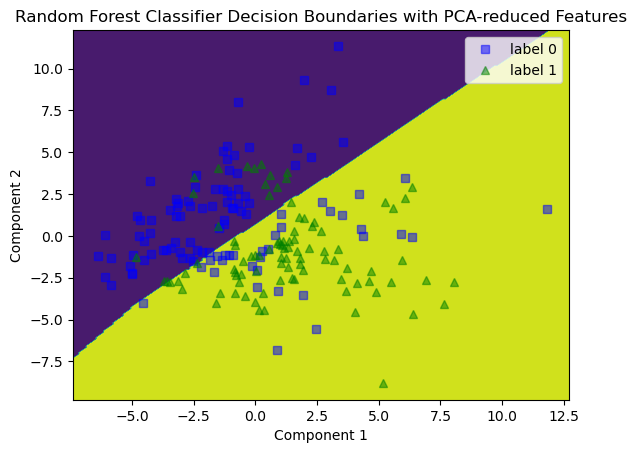

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
features_PCA = pca.fit_transform(X)

# Calculate 2D feature range
x_min = features_PCA[:, 0].min() - 1
x_max = features_PCA[:, 0].max() + 1
y_min = features_PCA[:, 1].min() - 1
y_max = features_PCA[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

# predict labels for the reduced feature range
orig_grid = pca.inverse_transform(grid)
modelClass = model.predict(orig_grid)
z = modelClass.reshape(xx.shape)

# plot model decision boundaries using contourf
plt.contourf(xx, yy, z)

# plot data
PlotData2D(features_PCA, y)
plt.title('Random Forest Classifier Decision Boundaries with PCA-reduced Features')


### Question 1C. Boosting classifier [14 marks]

In this task we will evaluate whether alternative approches can provide better accuracy. We will first tune a logistic regression classifier and then using as the base learning for Boosting.

**Task 1.5 [3 marks]:** Create, tune and fit a logistic regression classifier. Calculate and print training and CV accuracy of the tuned model.

In [ ]:
# Tune and fit Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

grid_param_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

lr = LogisticRegression(random_state=42)
grid_search_lr = GridSearchCV(lr, grid_param_lr, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_lr.fit(X,y)

# save best model
model2 = grid_search_lr.best_estimator_

best_C = grid_search_lr.best_params_['C']
training_accuracy_lr = model2.score(X, y)
cv_scores_lr = cross_val_score(model2, X, y, cv=5, scoring='accuracy', n_jobs=-1)
cv_accuracy_lr = cv_scores_lr.mean()

print("Best parameter C:", best_C)
print("Training accuracy:", round(training_accuracy_lr,2))
print("Best CV accuracy:", round(cv_accuracy_lr,2))

Best parameter C: 0.01
Training accuracy: 0.77
Best CV accuracy: 0.76


**Task 1.6 [4 marks]:** Boosting.
* Use an AdaBoost classifier to perform Boosting using the tuned logistic regression classifier as your base learner.
* Calculate training accuracy and cross-validated accuracy of your trained AdaBoost classifier.
* Plot the results for the AdaBoost classifier as you did with random forest.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost classifier
modelBoost = AdaBoostClassifier(random_state=42, n_estimators=100, estimator=model2)
modelBoost.fit(X, y)

training_accuracy_boost = modelBoost.score(X, y)
cv_scores_boost = cross_val_score(modelBoost, X, y, cv=5, scoring='accuracy', n_jobs=-1)
cv_accuracy_boost = cv_scores_boost.mean()

print("Training accuracy:", round(training_accuracy_boost,2))
print("Best CV accuracy:", round(cv_accuracy_boost,2))

Training accuracy: 0.79
Best CV accuracy: 0.76


Text(0.5, 1.0, 'AdaBoost Classifier Decision Boundaries with PCA-reduced Features')

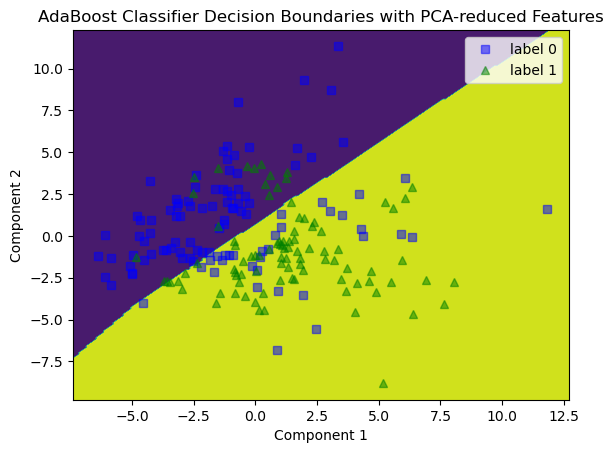

In [ ]:
# plot decision boundary and data

# Perform PCA
pca = PCA(n_components=2)
features_PCA = pca.fit_transform(X)

# Calculate 2D feature range
x_min = features_PCA[:, 0].min() - 1
x_max = features_PCA[:, 0].max() + 1
y_min = features_PCA[:, 1].min() - 1
y_max = features_PCA[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

# predict labels for the reduced feature range
orig_grid = pca.inverse_transform(grid)
modelClass = model.predict(orig_grid)
z = modelClass.reshape(xx.shape)

# plot model decision boundaries using contourf
plt.contourf(xx, yy, z)

# plot data
PlotData2D(features_PCA, y)
plt.title('AdaBoost Classifier Decision Boundaries with PCA-reduced Features')


**Question [6 marks]**: Compare and contrast performances of Random forest, Logistic Regression and Adaboost classifiers. Try to reason why we observe such performance.

**Your answer [max 75 words]**:

In [ ]:
# The random forest performed the best with the highest accuracy of 0.79 and cv of 0.77. This is likely due to its ability to capture complex, non-linear patterns in the classes through an ensemble of decision trees.
# The logistic regression performed the worst with accuracy of 0.77 and cv of 0.76. The regression assumes a linear separability between classes, which may not capture the more complex patterns.
# The AdaBoost improved the logistic regression's performance with accuracy of 0.79 and cv of 0.76, bringing it closer to the random forest. This is likely due to focussing on past errors but still unable to match random forest's ability to capture complex patterns.

**Question [1 mark]:** Suggest what you could do to further improve the performance.

**Your answer [max 50 words]:**

In [ ]:
# Perform more extensive hyperparameter tuning (by trying more values for each parameter) on both random forest and logistic regression to improve each of their performances.

## Question 2 - Neural network classification
Design and train a neural network in Pytorch for classification of the Breast Cancer Wisconsin Prognostic Dataset.

 **[Total: 20 marks]**

**Task 2.1  [7 marks]**: Define an architecture of a neural network in Pytorch with these properties:
* 4 linear layers with 32, 16, 4 outputs
* ReLU activation functions after the first three layers
* Sigmoid activation function after the final layer
* Binary cross entropy loss

In [9]:
import torch
import torch.nn as nn

# Define network architecture
class NNClassifier(nn.Module):
    def __init__(self, input_dim):
        super(NNClassifier, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.layer2 = nn.Linear(32, 16)
        self.layer3 = nn.Linear(16, 4)
        self.layer4 = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        x = self.relu(x)
        x = self.layer4(x)
        x = self.sigmoid(x)
        return x.squeeze(-1)

# Loss function
loss_function = nn.BCELoss()


__Task 2.2 [8 marks]:__
Complete the code below to train and evaluate the network. The dataset has been split for you into training, validation and test set.

Perform following:
* Complete the training loop
* Plot the change in loss for each epoch for both the training and validation dataset.
* Set an appropriate number of epochs and approprite learning rate.


Text(0.5, 1.0, 'Training and Validation Loss')

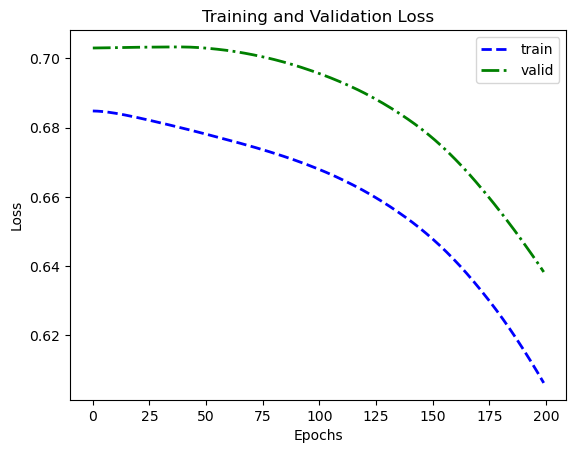

In [46]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert to Pytorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_valid = torch.from_numpy(X_valid).float()
y_valid = torch.from_numpy(y_valid).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

# Create the model
net = NNClassifier(input_dim=X.shape[1])

# Create the opptimizer
optimiser = torch.optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

# Training the model
epochs = 200
train_loss = np.zeros([epochs,1])
valid_loss = np.zeros([epochs,1])

for i in range(epochs):
    net.train()

    # 1. Clear gradients
    optimiser.zero_grad()

    # 2. Forward pass
    prediction = net(X_train)

    # 3. Compute Training loss
    loss = loss_function(prediction, y_train)
    train_loss[i] = loss.detach().numpy()

    # 4. Calculate gradients
    loss.backward()

    # 5. Update network parameters
    optimiser.step()

    # 6. Compute Validation loss
    with torch.no_grad():
        net.eval()
        val_pred = net(X_valid)
        val_loss = loss_function(val_pred, y_valid)
        valid_loss[i] = val_loss.detach().numpy()

plt.plot(np.arange(epochs), train_loss.squeeze(), color='blue', linestyle='--', linewidth=2, markersize=8, label = 'train');
plt.plot(np.arange(epochs), valid_loss.squeeze(), color='green', linestyle='-.', linewidth=2, markersize=8, label = 'valid');
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

**Question [2 marks]:** Explain how your your plot showing the change in loss function per epoch demonstrates you have set the appropriate number of maximum epochs and learning rate.

**Your answer [max 50 words]:**

In [ ]:
# The model shows a steadily decreasing training and validation loss over epochs whilst maintaining a similar distance apart to one another.
# This indicates that the learning is effective whilst not having too many epochs which would cause overfitting (spiking in the curve).

__Task 2.3 [3 marks]:__
Evaluate your network performance by completing the following:
* Evaluate accuracy on test set and print
* Plot decision boundary as in Task 1.4

Test accuracy:  0.6


Text(0.5, 1.0, 'NN Decision Boundaries with PCA-reduced Features')

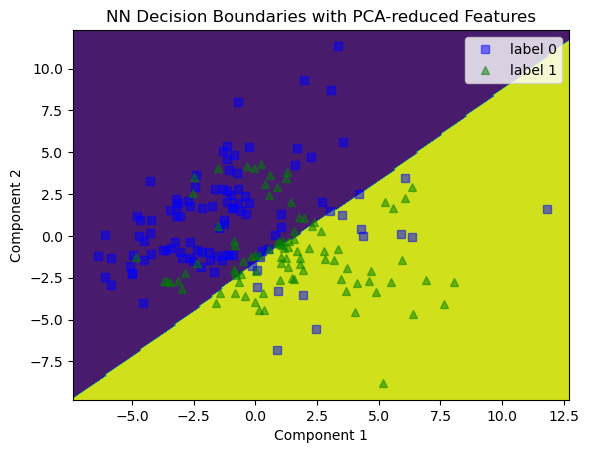

In [47]:
# accuracy on test set
with torch.no_grad():
    net.eval()
    prob_shape = net(X_test)
    y_pred = (prob_shape >= 0.5).int()
    test_accuracy = (y_pred.numpy() == y_test.numpy()).mean()
print('Test accuracy: ', round(test_accuracy,2))

# plot decision boundary - 1 mark as this is a repeat of Task 1.4
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_PCA = pca.fit_transform(X)

x_min = features_PCA[:, 0].min() - 1
x_max = features_PCA[:, 0].max() + 1
y_min = features_PCA[:, 1].min() - 1
y_max = features_PCA[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

data = pca.inverse_transform(grid)

data_torch = torch.from_numpy(data).float()
with torch.no_grad():
    net.eval()
    data_shape = net(data_torch)
    data_pred = (data_shape >= 0.5).int()
modelClass = np.around(data_pred)
z = modelClass.reshape(xx.shape)

# plot model decision boundaries using contourf
plt.contourf(xx, yy, z)

# plot data
PlotData2D(features_PCA, y)
plt.title('NN Decision Boundaries with PCA-reduced Features')

## Question 3 - GMM segmentation

**[Total: 20 marks]**

### SWI for visualisation of brain vessels

Susceptibility weighted imaging (SWI) is a MRI modality that gives good contrast for visualisation of blood vessels in the brain. You are given one slice of SWI image of a newborn baby acquired at 7T scanner at St Thomas Hospital. The file is named  _'brainSWI.npy'_. Your task is to segmenent the vessels in this image using Gaussian Mixture Model. Note that the vessels apprear dark on SWI, and the brain has been masked and padded by zeros.

In [ ]:
# only do this if you work on Google Colab
# uncomment code below and run the cell
# then upload file 'brainSWI.npy'

# uncomment this
# from google.colab import files
# files.upload()

(386, 350)

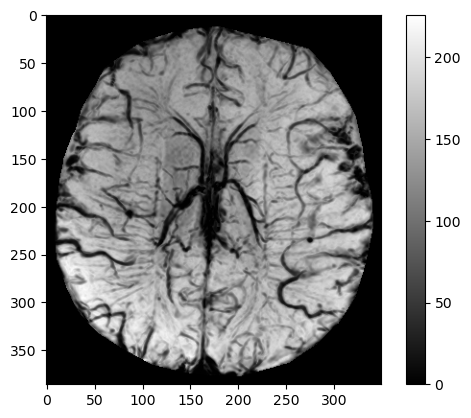

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# load  the image
brain = np.load('datasets/brainSWI.npy') # edit the path for google colab

# display the image
plt.imshow(brain)
plt.set_cmap('gray')
plt.colorbar()
brain.shape

### GMM for vessel segmentation

__Task 3.1 [4 marks]:__ Segment the SWI brain image using Gaussian Mixture Model to predict the binary mask of the vessels. Display binary mask of the segmented vessels.

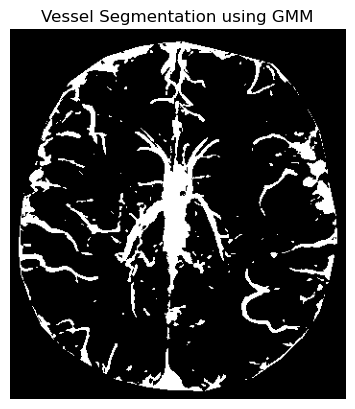

In [ ]:
# perform GMM segmentation
from sklearn.mixture import GaussianMixture

mask = brain>0
X = brain[mask].reshape(-1,1)

model = GaussianMixture(n_components=3, random_state=42)
model.fit(X)

means = model.means_.flatten()
vessel = np.argmin(means)

labels = model.predict(X)
vessel_mask = np.zeros(brain.shape, dtype=np.uint8)
vessel_mask[mask] = (labels == vessel).astype(np.uint8)

# display segmentation
plt.imshow(vessel_mask, cmap='gray')
plt.title('Vessel Segmentation using GMM')
plt.axis('off')
plt.show()

### Analyse your fitted GMM model

__Task 3.2 [3 marks]:__ For your fitted GMM model
* Calculate the (per-pixel) posterior probability map for the cluster that corresponds to blood vessels. Display it as an image.
* Print out the prior probability for the blood vessel cluster.
* Calculate the (per-pixel) likelihoods of the vessel cluster. Display it as an image.

_Notes on plotting per pixel likelihood:_
* _In the tutorials we plotted likelihoods scaled by the priors so that we are able to plot them over the histogram. In this question you are asked to plot the original likelihoods that have not been scaled by priors._
* _In the tutorials we plotted likelihood for the intensity range and not for the image. You need to think how to do that as no code for that is given in the materials provided._

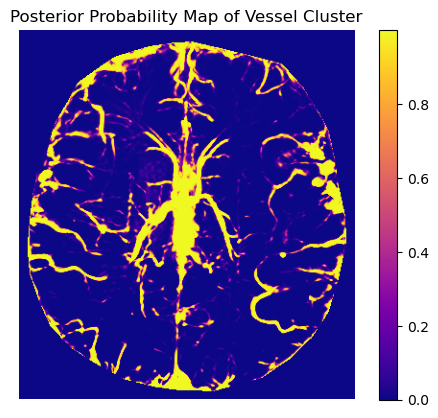

In [ ]:
# predict and plot posterior probability of the vessel cluster as an image
proba = model.predict_proba(X)
post_vals = proba[:, vessel]
post_map = np.zeros(brain.shape, dtype=float)
post_map[mask] = post_vals

plt.imshow(post_map, cmap='plasma')
plt.colorbar()
plt.title('Posterior Probability Map of Vessel Cluster')
plt.axis('off')
plt.show()

In [ ]:
# Prior for the vessel cluster
print('Prior probability for the vessel cluster: ', round(model.weights_[vessel],2))

Prior probability for the vessel cluster:  0.18


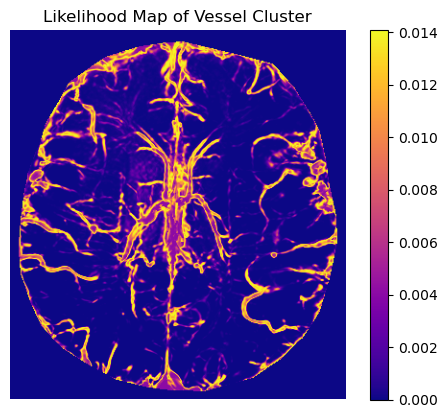

In [ ]:
# Calculate and display likelihood of the vessel cluster as an image
from scipy.stats import norm

means = model.means_.flatten()
covars = model.covariances_.flatten()

vessel_mean = means[vessel]
vessel_covar = covars[vessel]

# Gaussian probability density function formula
likelihood_vals = norm.pdf(X.flatten(), vessel_mean, np.sqrt(vessel_covar))

likelihood_map = np.zeros(brain.shape, dtype=float)
likelihood_map[mask] = likelihood_vals

plt.imshow(likelihood_map, cmap='plasma')
plt.colorbar()
plt.title('Likelihood Map of Vessel Cluster')
plt.axis('off')
plt.show()

__Task 3.3 [3 marks]:__ Explain why we see more small vessels in the posterior map than in the vessels segmentation.

__Your answer [max 75 words]:__

In [ ]:
# The posterior map uses continuous probabilities whereas the segmentation uses binary thresholding.
# Small or low contrast vessels may have moderate posterior probailities but not enough to reach the hard binary cut-off.
# This results in them appearing on the posterior map but may get excluded from the binary mask.

### Calculate posteriors by hand

__Task 3.4 [5 marks]:__ Consider pixel (200,200). Print out:
* image intensity
* likelihoods for all clusters
* priors for all clusters
* posterior for all clusters

In [ ]:
# get index of pixel (200,200)
i,j = 200,200
coords = np.argwhere(mask)
match = np.all(coords == [i, j], axis=1)
idx = np.where(match)[0][0]

# print intensity
intensity = brain[i,j]
print ('Pixel intensity at (200,200): ', intensity)

# print likelihoods
log_prob = model._estimate_log_prob(X)
likelihoods = np.exp(log_prob[idx])
print('Likelihoods for all clusters: ', likelihoods)

# print priors
priors = model.weights_
print('Priors for all clusters: ', priors)

# print posteriors
print('Posteriors for all clusters: ', model.predict_proba(X)[idx])


Pixel intensity at (200,200):  142.0
Likelihoods for all clusters:  [4.29923874e-05 1.33830859e-02 1.06525387e-02]
Priors for all clusters:  [0.18170152 0.40422934 0.41406914]
Posteriors for all clusters:  [0.00079481 0.55042138 0.44878381]


__Task 3.5 [5 marks]:__ Using the cluster priors and likelihoods for pixel (200,200) that you printed out in Task 3.4, show how you can calculate the posterior by hand.

__Your calcuation here:__

In [ ]:
# Likelihoods: [4.29923874e-05 1.33830859e-02 1.06525387e-02]
# Priors: [0.18170152 0.40422934 0.41406914]

# Posterior = (Likelihood * Prior) / Evidence

# Evidence = sum over all clusters of (Likelihood * Prior)
# Evidence = 0.00982853525661075

# Posterior for cluster 1 = 4.29923874e-05 * 0.18170152 / 0.00982853525661075 = 0.00079481 (8 d.p.)
# Posterior for cluster 2 = 1.33830859e-02 * 0.40422934 / 0.00982853525661075 = 0.55042138 (8 d.p.)
# Posterior for cluster 3 = 1.06525387e-02 * 0.41406914 / 0.00982853525661075 = 0.44878381 (8 d.p.)

# Posteriors for all clusters: [0.00079481 0.55042138 0.44878381] as matches expected.


## Question 4 - CNN Classification

**[Total: 30 marks]**

### Detecting cancer from histopatological images
In this question we will implement a CNN to classify histopatological images for presence of cancer. More details about the PatchCamelyon dataset can be found here https://github.com/basveeling/pcam.
<img src="datasets/pcam.jpg" style="max-width:100%; width: 100%; max-width: none">

### Load the dataset

For this question we recommend you use **google colab**. Watch the 'Instructions for Colab' video on KEATS if you have not done so, and make sure to **change colab runtime to GPU** else it will take too long to train.

Let's start by importing Pytorch and checking that we have GPU (cuda is available):

In [1]:
import torch
torch.cuda.is_available()

True

To upload the data to colab, complete the following steps:

_Step 1:_ First mount your drive by running the below cell and following the 'sign in' steps.

In [9]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


_Step 2:_  Upload the data set `'histological_data.npz'` to your Google drive. Edit the path below to define where you have put the data relative to the top level of your drive. Then run the cell to load the dataset.

In [10]:
# edit this path to match where you put your data
path='histological_data.npz'

full_path=os.path.join('/content/drive/My Drive', path)

# Load dataset from .npz file
import numpy as np
data = np.load(full_path)

Alternatively, (instead of steps 1 and 2), if you work locally uncomment the code in the cell below to load the data. Only work locally if you have GPU available.

In [ ]:
# local
# import numpy as np
# data = np.load('datasets/histological_data.npz')

Run the code below to check the import has worked and print out the train and validation dataset dimensions. You should find the training data has shape (1500,96,96) and the validation data has shape (150,96,96). This means that your images are 2D with dimensions 96 x 96. Note that we will work with only training and validation set, in real life you need to have test set too.

In [11]:
# Training images and labels
X_train = data['X_train']
y_train = data['y_train'].astype('int')

# Validation images and labels
X_val  = data['X_test']
y_val  = data['y_test'].astype('int')

# Print shapes
print('Training images:', X_train.shape)
print('Training labels:',y_train.shape)
print('Validation images:',X_val.shape)
print('Validation labels:',y_val.shape)

Training images: (1500, 96, 96)
Training labels: (1500,)
Validation images: (150, 96, 96)
Validation labels: (150,)


Let's now plot a few example histopathological images. Note that label 1 means presence of cancerous cells.

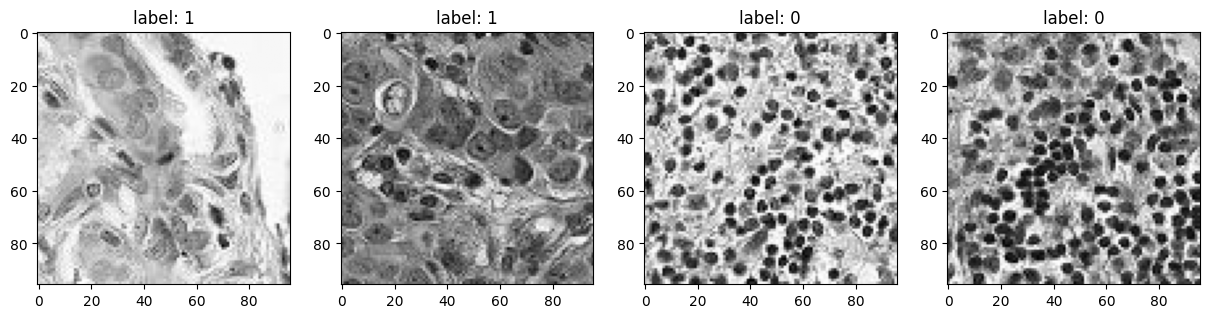

In [12]:
import matplotlib.pyplot as plt

id_images = [4, 5, 6, 7]

plt.figure(figsize=(15, 8))
for i in np.arange(0, 4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[id_images[i], :, :], cmap='gray')
    plt.title('label: ' + str(y_train[id_images[i]]))

Finally we need to reshape the data to fit the dimensions expected by pytorch and convert to torch tensors (e.g. 4D tensors batch$\times$channels$\times$height$\times$width for the images, 1D tensors for labels).

In [13]:
import torch

X_train_torch=torch.from_numpy(np.expand_dims(X_train,axis=1)).to(torch.float)
X_val_torch=torch.from_numpy(np.expand_dims(X_val,axis=1)).to(torch.float)

y_train_torch=torch.from_numpy(y_train).to(torch.long)
y_val_torch=torch.from_numpy(y_val).to(torch.long)

print('Training images: ', X_train_torch.shape)
print('Training labels:',y_train_torch.shape)
print('Validation images:',X_val_torch.shape)
print('Validation labels:',y_val_torch.shape)

Training images:  torch.Size([1500, 1, 96, 96])
Training labels: torch.Size([1500])
Validation images: torch.Size([150, 1, 96, 96])
Validation labels: torch.Size([150])


### Create your CNN architecture

In the cell below is the skeleton of the CNN classification network that you will use to classify the histology images into healthy and cancerous.

__Task 4.1 [3 marks]:__ Implement your network architecture, consisting of the convolutional, pooling and linear layers as follows:
* convolutional layer 1 with 8 filters, kernel size 5, stride 1 and default padding, followed by Relu activation and max pooling with kernel size 2
* convolutional layer 2 with 16 filters, kernel size 5, stride 1 and default padding, followed by Relu activation and max pooling with kernel size 2
* fully connected layer 1 with 32 neurons
* fully connected layer 2 with 2 neurons

In [46]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 8, 5, stride=1)
        self.conv2 = nn.Conv2d(8, 16, 5, stride=1)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(7056, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x



**Task 4.2 [4 marks]:** Give the dimensions of the learnable parameters (weights and biases) for
*  the first convolutional layer `conv1`

  __Your answer:__

* the second convolutional layer `conv2`

  __Your answer:__

In [17]:
# Conv1: Weights (8,1,5,5), Biases (8)
# Conv2: Weights (16,8,5,5), Biases (16)

**Task 4.3 [5 marks]:** Calculate by hand the total number of learnable parameters (weights and biases) trained in this network. Show how you worked it out.

__Your answer:__



In [ ]:
# conv1: (8*1*5*5)+8 = 208
# conv2: (16*8*5*5)+16 = 3216
# Input size: 96x96
# conv1: 96-5+1 = 92x92
# first maxPool (2x2): 46x46
# conv2: 46-5+1 = 42x42
# second maxPool (2x2): 21x21
# no. of feature maps: 16
# flattened size: 21*21*16 = 7056
# fc1: (7056*32)+32 = 225824
# fc2: (32*2)+2 = 66
# Total Params: 208+3216+225824+66 = 229314


__Task 4.4 [6 marks]:__  Assuming a single input image (e.g. batch size = 1), calculate by hand the dimension of the output of each convolutional, pooling and fully connected layer. Explain your calculations.

__Your answer:__


In [ ]:
# input: (1 batch, 1 channel, 96 height, 96 width)
# output_size = (width-kernal)/stride + 1 (no padding)
# conv1: (96-5)/1 + 1 = 92
# 8 filters so 8 feature maps
# conv1: (1, 8, 92, 92)
# first maxPool: (halves spatial dims) 92/2 = 46
# first maxPool: (1, 8, 46, 46)
# conv2: (46-5)/1 + 1 = 42
# 16 filters so 16 feature maps
# conv2: (1, 16, 42, 42)
# second maxPool: 42/2 = 21
# second maxPool: (1, 16, 21, 21)
# flatten layer: all dims are flattened (except batch) 16*21*21 = 7056
# flatten layer: (1, 7056)
# fc1 (7056, 32): output = (1, 32)
# fc2 (32,2): output = (1, 2)


### Train your network

__Task 4.5 [5 marks]:__ You have been given a skeleton of the training loop.
* Create an instance of your network on GPU
* Use cross-entropy loss function
* Define an optimiser with a suitable learning rate (e.g. SDG, momentum, Adam)
* Complete the code to perform training and validation
* Save both training and validation loss at each epoch for plotting later
* Calculate and save validation accuracy for plotting later
* Print out training and validatation loss every 10 iterations (code is given).

_Note: You should aim at the best validation accuracy at least 0.8. Sometimes the network gets stuck in local minima (e.g. predicts label 0 for all images), or it can oscilate. Tune your optimiser and learning rate, until you find a good solution._

In [58]:
from sklearn.metrics import accuracy_score
import torch.optim as optim

# Create GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create network
net = Net().to(device)

# Cross-entropy loss
loss_fun = nn.CrossEntropyLoss()
loss_fun = loss_fun.to(device)

# Optimiser
optimiser = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

# Train
epochs = 201
accuracy = []
train_loss = []
val_loss = []

for epoch in range(epochs):

    # training
    net.train()

    X_train_torch = X_train_torch.to(device)
    y_train_torch = y_train_torch.to(device)

    optimiser.zero_grad()

    train_out = net(X_train_torch)

    train_error = loss_fun(train_out, y_train_torch)
    train_loss.append(train_error.cpu().detach().numpy())

    train_error.backward()

    optimiser.step()

    # validation
    with torch.no_grad():
        net.eval()

        X_val_torch = X_val_torch.to(device)
        y_val_torch = y_val_torch.to(device)

        val_out = net(X_val_torch)
        val_error = loss_fun(val_out, y_val_torch)
        val_loss.append(val_error.cpu().detach().numpy())
        preds = torch.argmax(val_out, dim=1)

        val_acc = accuracy_score(y_val_torch.cpu().numpy(), preds.cpu().numpy())
        accuracy.append(val_acc)

        if epoch % 10==0:
            s='Epoch: {}, Train loss: {:.2f}, Val Loss: {:.2f}, Val acc: {:.2f}'
            print(s.format(epoch,train_loss[-1], val_loss[-1], val_acc ))


Epoch: 0, Train loss: 0.70, Val Loss: 0.70, Val acc: 0.33
Epoch: 10, Train loss: 0.67, Val Loss: 0.62, Val acc: 0.67
Epoch: 20, Train loss: 0.67, Val Loss: 0.64, Val acc: 0.67
Epoch: 30, Train loss: 0.66, Val Loss: 0.63, Val acc: 0.67
Epoch: 40, Train loss: 0.66, Val Loss: 0.63, Val acc: 0.67
Epoch: 50, Train loss: 0.66, Val Loss: 0.62, Val acc: 0.67
Epoch: 60, Train loss: 0.65, Val Loss: 0.62, Val acc: 0.68
Epoch: 70, Train loss: 0.64, Val Loss: 0.62, Val acc: 0.65
Epoch: 80, Train loss: 0.64, Val Loss: 0.62, Val acc: 0.66
Epoch: 90, Train loss: 0.63, Val Loss: 0.61, Val acc: 0.66
Epoch: 100, Train loss: 0.62, Val Loss: 0.60, Val acc: 0.68
Epoch: 110, Train loss: 0.61, Val Loss: 0.60, Val acc: 0.68
Epoch: 120, Train loss: 0.60, Val Loss: 0.59, Val acc: 0.70
Epoch: 130, Train loss: 0.60, Val Loss: 0.58, Val acc: 0.71
Epoch: 140, Train loss: 0.59, Val Loss: 0.57, Val acc: 0.72
Epoch: 150, Train loss: 0.57, Val Loss: 0.56, Val acc: 0.72
Epoch: 160, Train loss: 0.56, Val Loss: 0.54, Val a

### Analyse your results

__Task 4.6 [3 marks]:__ Display the following results:
* Plot the training and validation loss over epochs
* Plot validation accuracy over epochs
* Print out the best accuracy and epoch in which it occured


Text(0.5, 1.0, 'Training and Validation Loss')

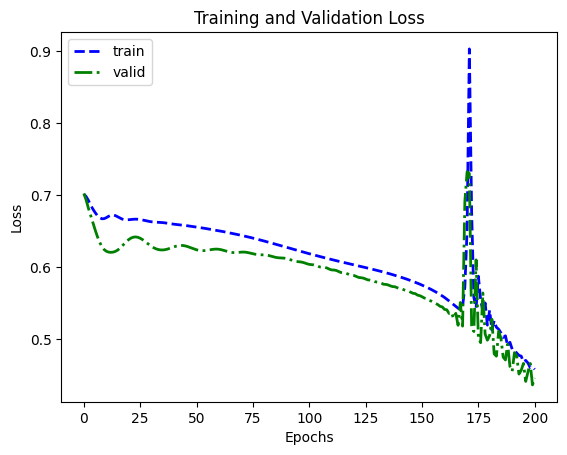

In [61]:
# plot training and validation loss
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(epochs), train_loss, color='blue', linestyle='--', linewidth=2, markersize=8, label = 'train');
plt.plot(np.arange(epochs), val_loss, color='green', linestyle='-.', linewidth=2, markersize=8, label = 'valid');
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')


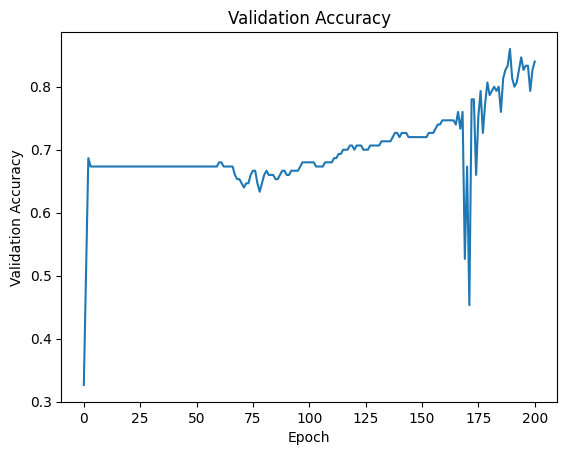

Best validation accuracy:  0.86
Best epoch:  189


In [64]:
# plot validation accuracy
plt.plot(np.arange(epochs), accuracy)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy')
plt.show()

# print best validation accuracy and epoch when it occured
best_val_acc = np.max(accuracy)
best_epoch = np.argmax(accuracy)

print('Best validation accuracy: ', np.around(best_val_acc,2))
print('Best epoch: ', best_epoch)

**Task 4.7 [4 marks]:** Discuss the results, including whether the network overfitted, which model would you select and how would you further improve the model.

__Your answer [max 100 words]:__

In [ ]:
# The accuracy peaked at 86%, making the model selected an overall success.
# The network did overfit as seen by the large spikes around 170 epochs.
# Accuracy did recover after temporary overfitting and continued to improve, all be it unstably.
# The steady decrease in loss after the first 160 epochs suggested that the model's learning hyperparameters were set well.
# For the best results, choosing around 160 epochs (just before overfitting) would have improved the network overall.